# **Importing Libraries**

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

# **Reading Data**

In [2]:
train_data = pd.read_csv("../input/Train.csv")
test_data = pd.read_csv("../input/Test.csv")

### **To Do** :

- Categorical : (console/ year/ category/ publisher/ rating(rank)
    - no ofcategories ?
    - fix missing with mode
    - bin / one hot 

- Numerical : (year/ critiv_points/ user_points/ sales)
    - check distribution
    - fix outliers
    - fix missing with mean/ median (match_dist)

- Normalize
- Base-Line

# **Data Cleaning**

In [3]:
train_data.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [4]:
test_data.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
0,4310,ps2,2008,action,Tecmo Koei,T,3.928571,0.482353
1,4011,psp,2007,strategy,Atari,E10+,5.538462,0.071795
2,2185,ps2,2004,shooter,Electronic Arts,T,3.034483,0.062044
3,1644,x,2006,action,Electronic Arts,E,2.913043,0.880000
4,188,3ds,2011,racing,Ubisoft,E10+,1.162162,0.183333


- Train Data Shape : (3506, 9)
- Test Data Shape  : (1503, 8)

In [5]:
# Checking for null values
test_data.isnull().sum()

ID                0
CONSOLE           0
YEAR              0
CATEGORY          0
PUBLISHER         0
RATING            0
CRITICS_POINTS    0
USER_POINTS       0
dtype: int64

# **Checking Feature Distribution**

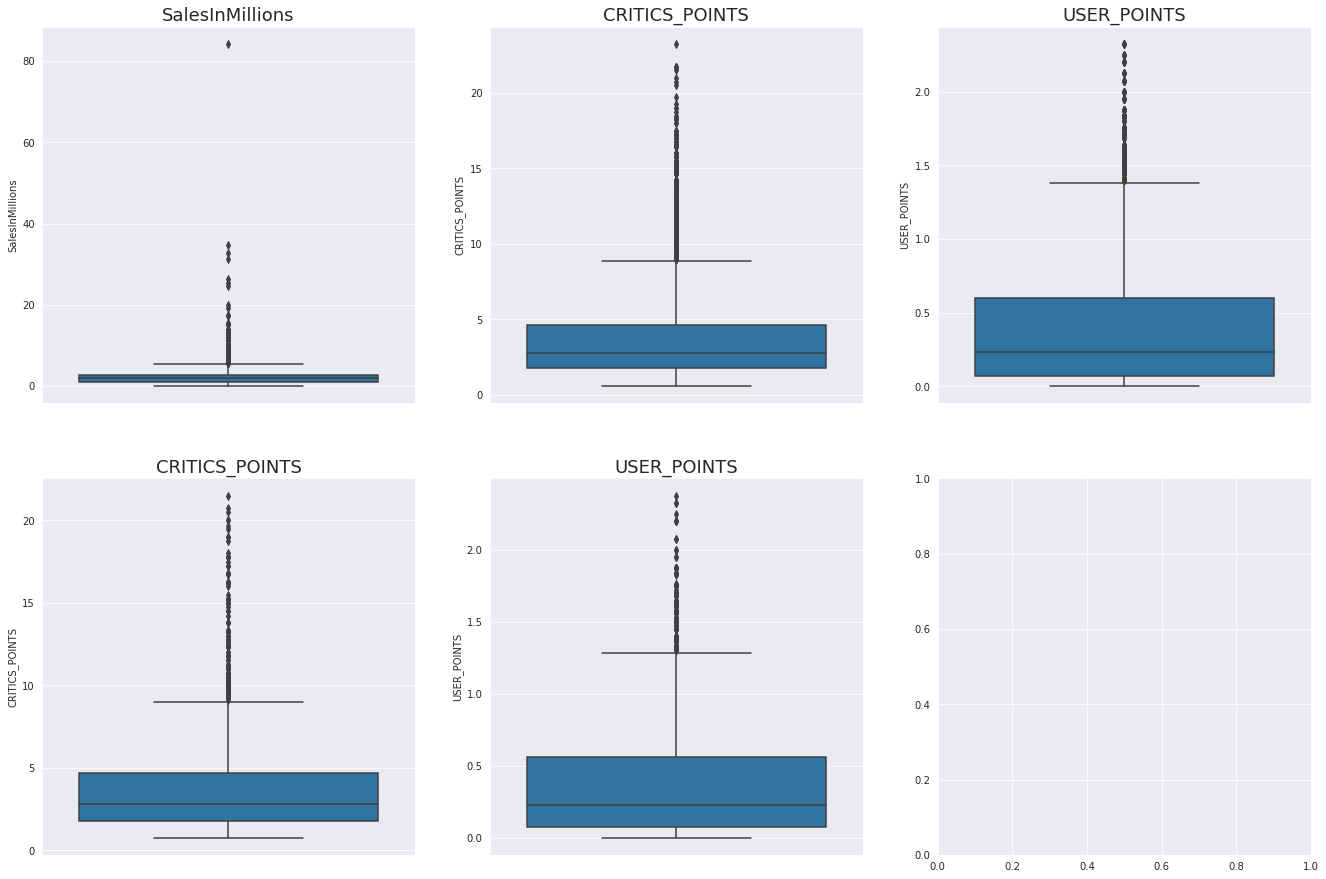

In [6]:
# Pot Distribution

fig, ax = plt.subplots(figsize = (3, 4), nrows = 2, ncols = 3)
ax_1 = sns.boxplot(y="SalesInMillions", data=train_data, ax = ax[0][0]);
ax_1.set_title("SalesInMillions", fontsize = 18)

ax_2 = sns.boxplot(y="CRITICS_POINTS", data=train_data, ax = ax[0][1]);
ax_2.set_title("CRITICS_POINTS", fontsize = 18)

ax_3 = sns.boxplot(y="USER_POINTS", data=train_data, ax = ax[0][2]);
ax_3.set_title("USER_POINTS", fontsize = 18)

ax_4 = sns.boxplot(y="CRITICS_POINTS", data=test_data, ax = ax[1][0]);
ax_4.set_title("CRITICS_POINTS", fontsize = 18)

ax_5 = sns.boxplot(y="USER_POINTS", data=test_data, ax = ax[1][1]);
ax_5.set_title("USER_POINTS", fontsize = 18)

fig.subplots_adjust(right = 6, top = 3)
fig.show()

**Conclusion** : Sales seems to contain an outlier with > 80 million sales. Remove the outliers

In [7]:
train_data = train_data[train_data['SalesInMillions'] < 40]

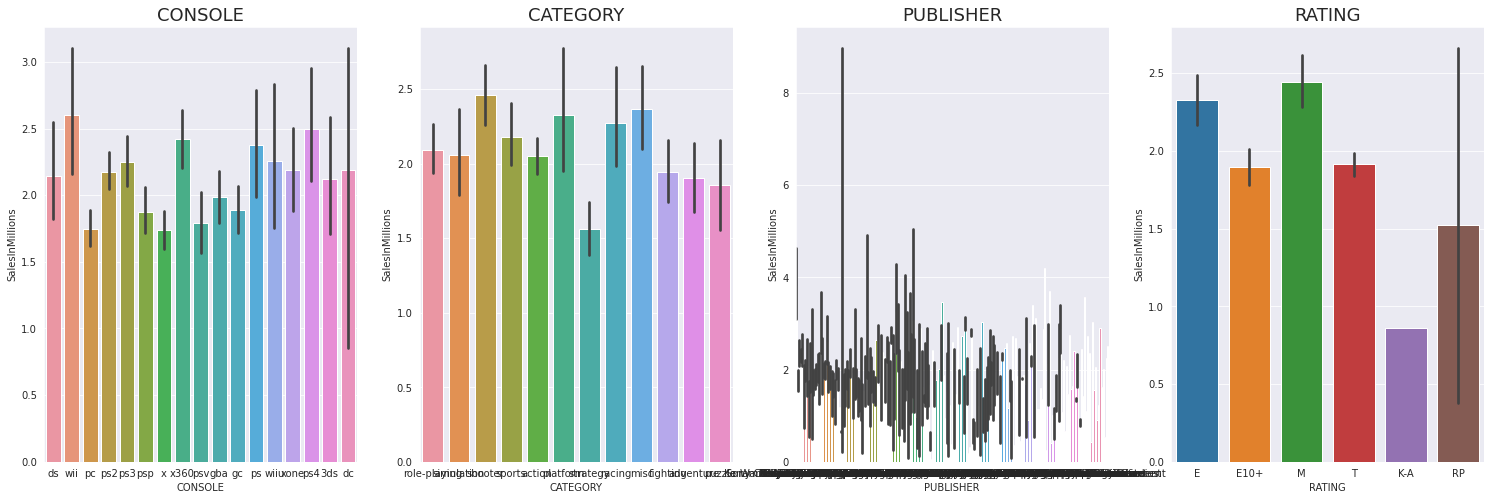

In [8]:
# Bar Plots
fig, ax = plt.subplots(figsize=(10, 8),ncols = 4)

ax1 = sns.barplot(x = 'CONSOLE', y = 'SalesInMillions', data = train_data, ax = ax[0]);
ax1.set_title('CONSOLE',  fontsize = 18)

ax1 = sns.barplot(x = 'CATEGORY', y = 'SalesInMillions', data = train_data, ax = ax[1]);
ax1.set_title('CATEGORY',  fontsize = 18)

ax1 = sns.barplot(x = 'PUBLISHER', y = 'SalesInMillions', data = train_data, ax = ax[2]);
ax1.set_title('PUBLISHER',  fontsize = 18)

ax1 = sns.barplot(x = 'RATING', y = 'SalesInMillions', data = train_data, ax = ax[3]);
ax1.set_title('RATING',  fontsize = 18)

fig.subplots_adjust(left = 1, right = 3)
fig.show()

**Conclusion** : Categorical data seems fairly balanced

In [9]:
print('Train Data missing values :\n',train_data.isnull().sum())
print('\nTest Data missing values :\n',test_data.isnull().sum())

Train Data missing values :
 ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

Test Data missing values :
 ID                0
CONSOLE           0
YEAR              0
CATEGORY          0
PUBLISHER         0
RATING            0
CRITICS_POINTS    0
USER_POINTS       0
dtype: int64


**Conclusion** : No missing values in train and test data

### **To Do** :

- Categorical : (CONSOLE/ YEAR/ CATEGORY/ PUBLISHER/ RATING
    - no ofcategories ?
    - bin / one hot 

- Numerical : (YEAR/ CRITIC_POINTS/ USER_POINTS/ SALES)
    - check distribution

- Normalize
- Base-Line

In [10]:
train_data.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


Converting year to number of years since it may represent age information

In [11]:
train_data['YEAR'] = 2020 - train_data['YEAR']
test_data['YEAR'] = 2020 - test_data['YEAR']
train_data.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,12,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,8,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,1,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,18,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,7,action,Activision,M,2.259259,0.032579,0.082671


# **Dealing with categorical variables**
The PUBLISHER column contains large number of values(unique). Hence OneHotEncoding would lead to a sparse dataset. Instead here I tried to group various values together based on some intuition and domain knowledge (Numeral encoding is used to preserve relative importance). This made the dataset easy to work with

In [12]:
# FIXING PUBLISHERS

# Sort publishers by counts
vals, cnts = np.unique(train_data['PUBLISHER'], return_counts = True)
mapping = {k : v for k,v in zip(vals,cnts)}
mapping = {k : v for (k,v) in sorted(mapping.items(), key = lambda x: x[-1], reverse = True)}

# Binning publishers by count
new_map = {1:[], 2:[], 3:[], 4:[], 5:[], 6:[]}
for k, v in mapping.items():
    if v >= 200 :
        new_map[6].append(k)
    elif v >= 150 :
        new_map[5].append(k)
    elif v >= 100 :
        new_map[4].append(k)
    elif v >= 50 :
        new_map[3].append(k)
    elif v >= 10 :
        new_map[2].append(k)
    else :
        new_map[1].append(k)
#new_map    

# Assign new categories to publishers (Numeral Label Encoding is used deliberately)
pub_mapping = {}
for a, b in mapping.items() :
    for l, m in new_map.items() :
        if a in m :
            pub_mapping[a] = l

#MAKE CHANGES
train_data['PUBLISHER'] = train_data['PUBLISHER'].map(pub_mapping)
test_data['PUBLISHER'] = test_data['PUBLISHER'].map(pub_mapping)
train_data.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,12,role-playing,5,E,2.833333,0.303704,1.779257
1,731,wii,8,simulation,4,E10+,13.200000,1.640000,0.215050
2,495,pc,1,shooter,6,M,4.562500,0.006410,0.534402
3,2641,ps2,18,sports,6,E,4.181818,0.326923,1.383964
4,811,ps3,7,action,6,M,2.259259,0.032579,0.082671


Similar grouping method of variable values was followed which were then converted to One Hot Values to designate no specific heirarchy among values

In [13]:
# FIXING CATEGORIES

# Sort categories by counts
vals, cnts = np.unique(train_data['CATEGORY'], return_counts = True)
mapping = {k : v for k,v in zip(vals,cnts)}
mapping = {k : v for (k,v) in sorted(mapping.items(), key = lambda x: x[-1], reverse = True)}

# New Mapping
cat_mapping = {'action': 'action',
                 'sports': 'sports',
                 'shooter': 'shooter',
                 'role-playing': 'role-playing',
                 'racing': 'sports',
                 'misc': 'misc',
                 'platform': 'misc',
                 'fighting': 'misc',
                 'simulation': 'misc',
                 'strategy': 'misc',
                 'adventure': 'misc',
                 'puzzle': 'misc'}

# MAP BY NEW ORDER
train_data['CATEGORY'] = train_data['CATEGORY'].map(cat_mapping)
test_data['CATEGORY'] = test_data['CATEGORY'].map(pub_mapping)

# Get dummies
categories_train = pd.get_dummies(train_data['CATEGORY'], drop_first = True)
categories_test = pd.get_dummies(test_data['CATEGORY'], drop_first = True)
train_data.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,12,role-playing,5,E,2.833333,0.303704,1.779257
1,731,wii,8,misc,4,E10+,13.200000,1.640000,0.215050
2,495,pc,1,shooter,6,M,4.562500,0.006410,0.534402
3,2641,ps2,18,sports,6,E,4.181818,0.326923,1.383964
4,811,ps3,7,action,6,M,2.259259,0.032579,0.082671


In [14]:
# FIXING CONSOLE

# Sort consoles by count
vals, cnts = np.unique(train_data['CONSOLE'], return_counts = True)
mapping = {k : v for k,v in zip(vals,cnts)}
mapping = {k : v for (k,v) in sorted(mapping.items(), key = lambda x: x[-1], reverse = True)}

# New Mapping
console_mapping = {'ps2': 'ps',
     'x360': 'xbox',
     'ps3': 'ps',
     'pc': 'pc',
     'x': 'xbox',
     'wii': 'other',
     'ds': 'other',
     'psp': 'ps',
     'gc': 'other',
     'gba': 'other',
     'ps4': 'ps',
     'xone': 'xbox',
     '3ds': 'other',
     'ps': 'ps',
     'psv': 'ps',
     'wiiu': 'other',
     'dc': 'other'}

# Map by new order
train_data['CONSOLE'] = train_data['CONSOLE'].map(console_mapping)
test_data['CONSOLE'] = test_data['CONSOLE'].map(console_mapping)

# Get dummies
console_train = pd.get_dummies(train_data['CONSOLE'], drop_first = True)
console_test = pd.get_dummies(test_data['CONSOLE'], drop_first = True)
#console

train_data.head(5)

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,other,12,role-playing,5,E,2.833333,0.303704,1.779257
1,731,other,8,misc,4,E10+,13.200000,1.640000,0.215050
2,495,pc,1,shooter,6,M,4.562500,0.006410,0.534402
3,2641,ps,18,sports,6,E,4.181818,0.326923,1.383964
4,811,ps,7,action,6,M,2.259259,0.032579,0.082671


In [15]:
# FIXING RATING

# Sort ratings by count
vals, cnts = np.unique(train_data['RATING'], return_counts = True)
mapping = {k : v for k,v in zip(vals,cnts)}
mapping = {k : v for (k,v) in sorted(mapping.items(), key = lambda x: x[-1], reverse = True)}

# New Mapping
rate_mapping = {'T': 'T', 'E': 'E', 'M': 'M', 'E10+': 'E10+', 'RP': 'M', 'K-A': 'M'}

# Map by new order
train_data['RATING'] = train_data['RATING'].map(rate_mapping)
test_data['RATING'] = test_data['RATING'].map(rate_mapping)

# Get Dummies
rating_train = pd.get_dummies(train_data['RATING'], drop_first = True)
rating_test = pd.get_dummies(test_data['RATING'], drop_first = True)
train_data.head(5)

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,other,12,role-playing,5,E,2.833333,0.303704,1.779257
1,731,other,8,misc,4,E10+,13.200000,1.640000,0.215050
2,495,pc,1,shooter,6,M,4.562500,0.006410,0.534402
3,2641,ps,18,sports,6,E,4.181818,0.326923,1.383964
4,811,ps,7,action,6,M,2.259259,0.032579,0.082671


In [16]:
# Concatenate dummies
train_data = pd.concat([train_data, categories_train, console_train, rating_train], axis = 1)
test_data = pd.concat([test_data, categories_test, console_test, rating_test], axis = 1)

# Drop redundant columns
train_data.drop(['ID', 'CATEGORY', 'RATING', 'CONSOLE'], axis = 1, inplace = True)
test_data.drop(['ID', 'CATEGORY', 'RATING', 'CONSOLE'], axis = 1, inplace = True)
train_data.head()

,YEAR,PUBLISHER,CRITICS_POINTS,USER_POINTS,SalesInMillions,misc,role-playing,shooter,sports,pc,ps,xbox,E10+,M,T
0,12,5,2.833333,0.303704,1.779257,0,1,0,0,0,0,0,0,0,0
1,8,4,13.200000,1.640000,0.215050,1,0,0,0,0,0,0,1,0,0
2,1,6,4.562500,0.006410,0.534402,0,0,1,0,1,0,0,0,1,0
3,18,6,4.181818,0.326923,1.383964,0,0,0,1,0,1,0,0,0,0
4,7,6,2.259259,0.032579,0.082671,0,0,0,0,0,1,0,0,1,0


Here empty columns were added to test dataset since it did not contain all values present in train set. This step was needed inorder to make the shape of train and test set same to fit various model.

In [17]:
# Make (Add missing cols in test) cols equal

train_cols = list(train_data.columns)
test_cols = list(test_data.columns)
#print(cols)
for col in train_cols :
    if col not in test_cols :
        test_data[col] = 0


test_data = test_data[train_data.columns]  # Rearrange cols acc to train data
#test_data.head()
test_data.drop(['SalesInMillions'], axis = 1, inplace = True)

# fill null values in test_dataset which may be created by the respective 'mode'
for column in test_data.columns:
    test_data[column].fillna(test_data[column].mode()[0], inplace=True)
#print(test_data.shape)

In [18]:
print(test_data.shape)
print(train_data.shape)
test_data.head()

(1503, 14)
(3505, 15)


,YEAR,PUBLISHER,CRITICS_POINTS,USER_POINTS,misc,role-playing,shooter,sports,pc,ps,xbox,E10+,M,T
0,12,3.0,3.928571,0.482353,0,0,0,0,0,1,0,0,0,1
1,13,3.0,5.538462,0.071795,0,0,0,0,0,1,0,1,0,0
2,16,6.0,3.034483,0.062044,0,0,0,0,0,1,0,0,0,1
3,14,6.0,2.913043,0.880000,0,0,0,0,0,0,1,0,0,0
4,9,6.0,1.162162,0.183333,0,0,0,0,0,0,0,1,0,0


In [19]:
temp_data = train_data
y = temp_data['SalesInMillions']
X = temp_data.drop(['SalesInMillions'], axis = 1)

In [20]:
# Shape Check
print('X: ',X.shape)
print('y: ', y.shape)
print(train_data.shape)
print(test_data.shape)

X:  (3505, 14)
y:  (3505,)
(3505, 15)
(1503, 14)


In [21]:
# Creating train/val/test splits
from sklearn.model_selection import train_test_split

# Train test split
X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.2, random_state=1)

# validation split from test set
X_test, X_val, y_test, y_val  = train_test_split(X_test, y_test, test_size=0.5, random_state=1) 

In [22]:
# Shape Check
print('X_train: ',X_train.shape, 'y_train: ', y_train.shape)
print('X_test: ',X_test.shape, 'y_test: ', y_test.shape)
print('X_val: ',X_val.shape, 'y_val: ', y_val.shape)

X_train:  (2804, 14) y_train:  (2804,)
X_test:  (350, 14) y_test:  (350,)
X_val:  (351, 14) y_val:  (351,)


In [23]:
# Normalizing values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_val = sc.transform(X_val)

test_data = sc.transform(test_data)

# **Baseline Model Comparision**
Fit various base models and compare their performance

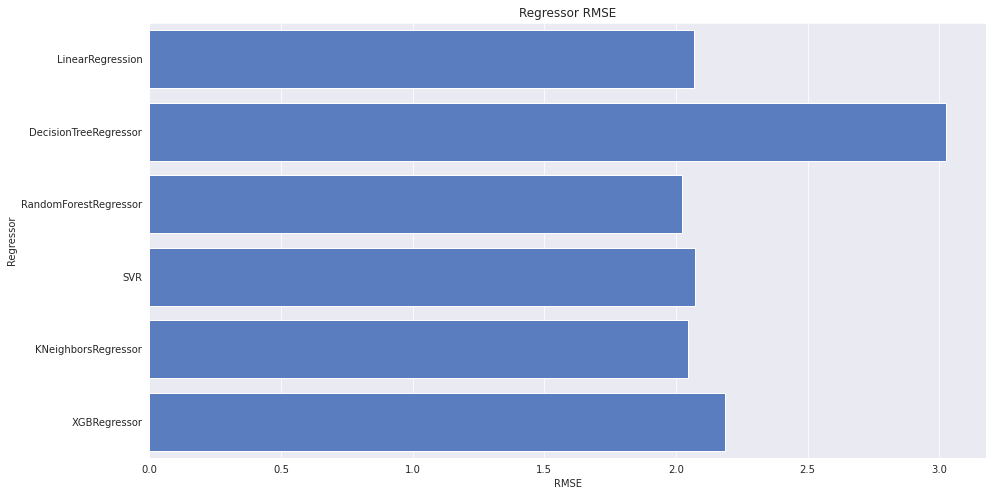

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

Regressors = [
    LinearRegression(),
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor(),
    XGBRegressor(),]

log_cols = ["Regressor", "RMSE"]
log 	 = pd.DataFrame(columns=log_cols)

acc_dict = {}


for clf in Regressors:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    #acc = accuracy_score(y_test, train_predictions)
    # rmse = np.sqrt(mean_squared_error(y_test, train_predictions))
    rmse = cross_val_score(clf, X_train, y_train, scoring='neg_mean_squared_error', cv=3)
    rmse = np.sqrt(-rmse)
    rmse = rmse.mean()
    if name in acc_dict:
        acc_dict[name] += rmse
    else:
        acc_dict[name] = rmse

for clf in acc_dict:
	#acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.figure(figsize=(15,8))
plt.xlabel('RMSE')
plt.title('Regressor RMSE')


sns.set_color_codes("muted")
sns.barplot(x='RMSE', y='Regressor', data=log, color="b")

**Conclusion** : 
- RandomForestRegressor seems to perform the best (XGBoost and other high end models are still not used)
- Linear Regression also seems to do a fair job indicating that the problem at hand may not be that complex

# **Testing Ensemble of Predictions**
The idea is to use base models to make predictions on test set and use these predictions as new features. Then use an aggregator model to predict values from new features
- **Base Models** : Train on 'train' set and get predictions on 'val' and 'test' set
- **Aggregator** : Train using 'val' predictions and get final predictions on 'test' set

In [25]:
# Get predictions from base models
from sklearn.ensemble import RandomForestRegressor

classifiers = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor(),
    XGBRegressor(),]


X_test_preds = pd.DataFrame({})
X_val_preds = pd.DataFrame({})

for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    val_predictions = clf.predict(X_val)
    X_val_preds[name] = val_predictions
    
    test_predictions = clf.predict(X_test)
    X_test_preds[name] = test_predictions

In [26]:
# Concatenating predictions with respective datasets
X_test_preds = pd.concat([pd.DataFrame(X_test), X_test_preds], axis = 1)
X_val_preds = pd.concat([pd.DataFrame(X_val), X_val_preds], axis = 1)

# Normalizing values
sc = StandardScaler()
X_val_preds = sc.fit_transform(X_val_preds)
X_test_preds = sc.transform(X_test_preds)

# Fitting summerization(aggregator) and single(to compare with)
summer = RandomForestRegressor()
single = RandomForestRegressor()

summer.fit(X_val_preds, y_val)
single.fit(X_train, y_train)


summer_predictions = summer.predict(X_test_preds)
single_predictions = single.predict(X_test)

rmse_single = np.sqrt(mean_squared_error(y_test, single_predictions))
rmse_summer = np.sqrt(mean_squared_error(y_test, summer_predictions))

print('RMSE Single: ',rmse_single, 'RMSE Combined: ',rmse_summer)

RMSE Single:  1.55569037789116 RMSE Combined:  1.5599172429695385


**Conclusion** : We saw that using predictions as extra features helped us to further improve our results! Hence, we use this approach to make final predictions

# **Final Predictions for test dataset**
To make final predictions using aggregator on the test dataset, testset dataframe should contain predictions by base models.
Hence get the following predictions by training base models on new train data (train + val) and predicting on new test (test):
- **final_X_test_predictions** --> for training aggregator for test dataset
- **final_test_predictions** --> to get final predictions of aggregator


In [27]:
from sklearn.ensemble import RandomForestRegressor

regressors = [
    DecisionTreeRegressor(),
    RandomForestRegressor(),
    SVR(),
    KNeighborsRegressor(),
    XGBRegressor(),]

X_train = np.concatenate((X_train, X_val))
y_train = np.concatenate((y_train, y_val))

final_X_test_predictions = pd.DataFrame({}) # for training aggregator
final_test_predictions = pd.DataFrame({}) # for prediction by aggregator

for clf in regressors:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    
    predictions = clf.predict(X_test)
    final_X_test_predictions[name] = predictions
    
    test_predictions = clf.predict(test_data)
    final_test_predictions[name] = test_predictions

In [28]:
# Concatenating predictions with respective datasets
final_train = pd.concat([pd.DataFrame(X_test), final_X_test_predictions], axis = 1)
final_test = pd.concat([pd.DataFrame(test_data), final_test_predictions], axis = 1)

# Normalizing values
sc = StandardScaler()
final_train = sc.fit_transform(final_train)
final_test = sc.transform(final_test)

# Get aggregator predictions
summer = RandomForestRegressor()
summer.fit(final_train, y_test)
summer_predictions = summer.predict(final_test)


In [29]:
# Save predictions to csv file
sub = pd.DataFrame({'SalesInMillions': summer_predictions})
sub.to_csv('submission.csv', index = False)

# **Further Work**
- Pick out best features (**feature selection**)
- Try using varoius **high capacity models** for base predictions
- Use **different aggregator** model
- **Tune hyperparameters** to obtain better base predictions